#  Medical Imaging 
##  Practical session 4: Image Processing - Part I 
### Image Enhancement and Filtering
### 23rd November 2021
***
**Jakub Ceranka, Sebastian Amador Sanchez, Jef Vandemeulebroucke\
Department of Electronics and Informatics (ETRO)\
Vrije Universitet Brussel, Pleinlaan 2, B-1050 Brussels, Belgium**

<font color=blue>Insert students names and IDs here</font>
BARTOLI LUDOVICO 02102117 ludovico.bartoli@ugent.be

VILLA VALERIA 02102628 valeria.villa@ugent.be

## Introduction
For more information on the following concepts see the lecture recordings, course slides and the related study material.

### Purpose
The goal of this exercise session is to obtain an insight in the image enhancement and filtering operations commonly applied in medical image processing.


### BraTS dataset
You will be working with images obtained from the [*Brain Tumor Segmentation (BRATS) Challenge*](http://www.braintumorsegmentation.org), which contains the scans of multiple glioma cases. 
Gliomas are a type of brain tumor that originate in the glial cells that surround the neurons. They are characterized by having various heterogeneous histological sub-regions. Therefore, they have varying intensity profiles. Consequently, to properly visualize them multimodal MRI scans have to be employed, making multimodal segmentation of brain tumors a major challenge in medical image analysis.

<img src="./images/brats.png" alt="drawing" width="800"/>

**(A)** Whole tumor visible in T2-FLAIR **(B)** Tumor core visible in T2 **(C)** Enhancing tumor (blue) and necrotic component (green) visible in T1-Contrast **(D)** Tumor sub-regions.

You DO NOT have to download the dataset, the images that you will use are included in this practical session. These images were artifically corrupted so that you can apply enhancing and denoising techniques:
- T1c image was corrupted with low contrast
- T2 image was corrupted with salt-and-pepper noise
- Flair image was corrupted with MR bias field signal

At the end of this session, it is exepected that you obtain enhanced and noise-free images where you can apply segmentation algorithms (Practical session 5: Image segmentation).

### Instructions
The jupyter notebook should be submitted as the report by teams of two using assignment functionality of Ufora.

Please complete this notebook and upload the following before the deadline **7th December, 2021, at 23:59**:
- the notebook in *.ipynb* format
- the executed notebook in *.html* format (File --> Download As --> HTML)

The report should contain concise answers to the questions (in specified cells), python code and plotted figures.
For this practical session, **we do not** require a separate written report in *.pdf* format.

This is the first session of a two-parts practicum. Therefore, you will have to save the resultant images for the following session. If you do not manage to generate the desired enhanced and noise-free images, these will be provided in the next session.


#### Questions:  [jceranka@etrovub.be](mailto:jceranka@etrovub.be), [samadors@etrovub.be](mailto:samadors@etrovub.be)

### Required modules
Before starting make sure you have installed the following libraries:

- ```SimpleITK``` -> Read and write images
- ```numpy``` -> Operation with arrays
- ```matplotlib``` -> Plot images
- ```skimage``` -> Filtering

# 1. Image Enhancement
## 1.1 The image histogram
The histogram is a representation of how many pixels have a certain intensity in the corresponding image. In image processeing, it facilitates the identification of image acquisition issues, for example:

- **Over and under exposure:** Are intensity values spread out (good) or clustered (bad)?

<img src="./images/hist_exposure.png" alt="drawing" width="800"/>

- **Contrast:** In the image, are there many distinct intensity values (high contrast) or the image uses few intensity values (low contrast)? A "normal" contrast is when intensity values are widely spread and there is a large difference between min and max intensity values. 

<img src="./images/hist_contrast.png" alt="drawing" width="800"/>

- **Dynamic range:** Related to the number of distinct pixels in the image.

<img src="./images/hist_dyn_range.png" alt="drawing" width="800"/>

Unlike previous examples, medical images, can however have a large intensity range, or even floating point intensities. This yields very large histograms and makes the pixel count per intensity impractical. 

<img src="./images/hist_mri.png" alt="drawing" width="600"/>

Therefore, in practice intensities are usually binned, i.e. grouped in a reduced number of bins with similar intensity.

## 1.2 Image enhancement

We shall discuss two ways of contrast improvement: 

1. [Linear contrast mapping](http://homepages.inf.ed.ac.uk/rbf/HIPR2/stretch.htm) or histogram stretching. It involves a linear transformation on the image intensities, such that the transformed intensities cover to the full range.
2. [Histogram equalisation](https://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_equalize.html). In this case, the aim is to obtain a uniform histogram, in which all intensities are equally represented. This can be done by applying a nonlinear transformation on the image intensities. It can be shown that the transform corresponds to the cumulative histogram.

## Exercise 1.1: Linear contrast mapping


- Start by reading the image "BraTS2021_01666_t1ce.mha" from the folder "BraTS2021_01666" with the command [```ReadImage(path_to_image)```](https://simpleitk.readthedocs.io/en/master/IO.html). 
- Visualize the image, first convert it to an array using ```sitk.GetArrayFromImage(image)```. Next, employ [```imshow(array)```](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.imshow.html) to plot the image. 
- Afterwards, use [```hist(image, bins)```](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html) from ```matplotlib``` with ```bins=64``` to view the histogram. 

Remember that ```SimpleITK``` returns an ITK object, you will have to convert the image to an array before using '```imshow(image)```' and '```hist(image, bins)```'.

- Write a function that performs linear histogram stretching (see course slides). Look at the result and its histogram with 64 bins. Compare with the histogram of the original.

To built the function:
1. Instead of using the minimum and maximum intensity values, start by obtaining the percentiles (P5 and P95) of the image array using [```np.percentile```](https://numpy.org/doc/stable/reference/generated/numpy.percentile.html).
2. [Clip](https://numpy.org/doc/stable/reference/generated/numpy.clip.html) the image array employing the values obtained previously. In other words, clipping will set all values below the P5 to 0, and all values above P95 to 1.
3. Apply the linear stretching transformation to the clipped image using the percentile values as min and max intensities (P5 and P95 respectively).

## Exercise 1.2: Histogram equalization

- Create a function that implements histogram equalization (see course slides) to the original image using [```np.histogram```](https://numpy.org/doc/stable/reference/generated/numpy.histogram.html). Look to the new histogram using 64 bins. 

To built the function:
1. Retrieve the histogram and the respective bin edges employing ```np.histogram```. You will have to apply ```.ravel()``` to the image array to correctly obtain the values.
2. Calculate the center of the bin edges.
3. Determine the cumulative histogram using [```.cumsum()```](https://numpy.org/devdocs/reference/generated/numpy.cumsum.html)
4. Re-scale the cumulative histogram between 0 and 1 by dividing with the max value of the cumulative histogram.
5. Use [```np.interp()```](https://numpy.org/doc/stable/reference/generated/numpy.interp.html) to apply the new distribution to the image. Since ```np.interp()``` is a one-dimensional linear interpolation, flat the original image array using [```flat```](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.flat.html).  Additionally, use the center of the bin edges as the new x-coordinates and the re-scaled cumulative histogram as the new y-coordinates.
6. Since the image of point 5 is a 1D-array, reshape it to the original size using [```.reshape(shape)```](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html).


## Report
<font color=blue> 
- Plot a three-by-two image comparison (use ```subplot```) of the image and corresponding histogram for the original image and the ones obtained through the different methods (i.e. linear contrast mapping and histogram equalisation).
- In the linear constrast mapping step we have introduced lower and upper intensity percentiles. What is the reason for that?
- Look at the output results and their histograms. Compare them with the histogram of the original input image. The histogram of the histogram-equalized output image is not perfectly uniform. What is the reason for this? 
-  Save the linear stretched image using ```save_image()``` function (provided below).
</font>

<font color=blue> Your answer here </font>

The image pixels are in range 0 160
the new max value of the image (not clipped using percentiles) is 255.0


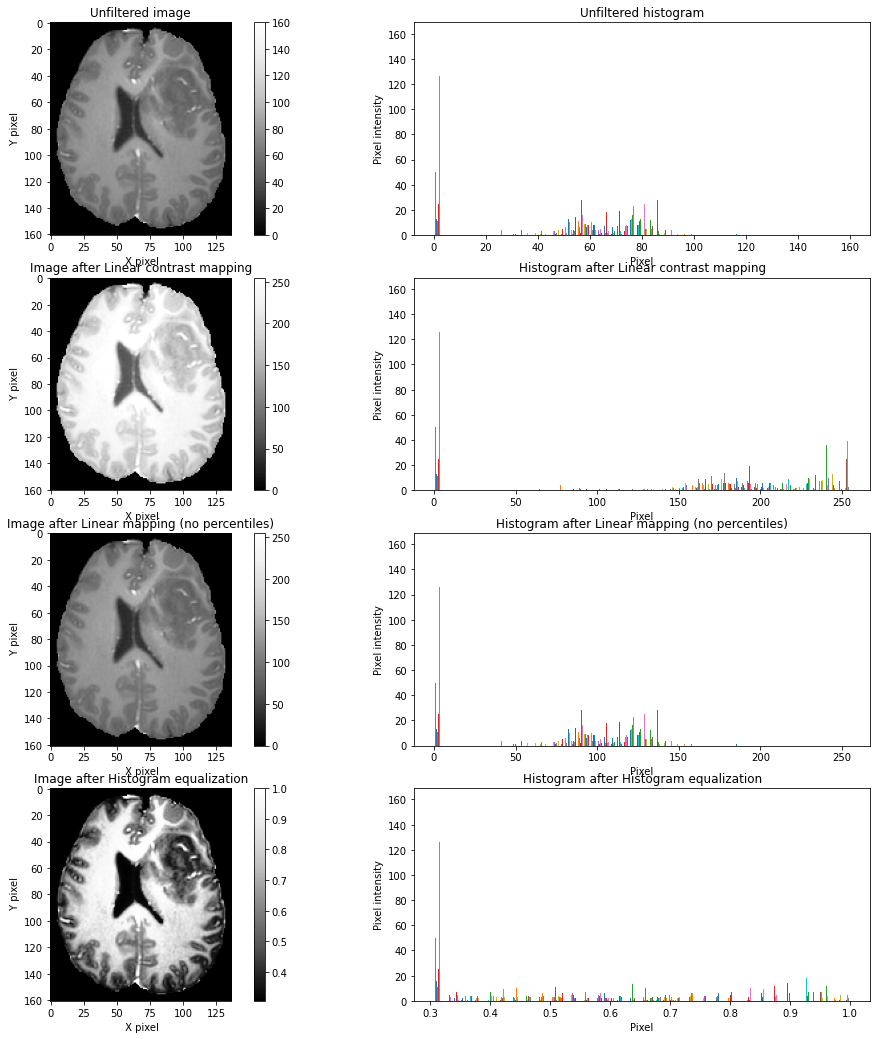

In [84]:
import SimpleITK as sitk
import numpy as np 
import matplotlib.pyplot as plt 
import skimage as sk

path_to_image= './BraTS2021_01666/BraTS2021_01666_t1ce.mha'
image= sitk.ReadImage (path_to_image)
image_array= sitk.GetArrayFromImage(image)

print('The image pixels are in range', np.min(image_array), np.max(image_array))

fig, [[ax1, ax2], [ax3, ax4], [ax5,ax6], [ax7,ax8]]= plt.subplots (4, 2, figsize= (18,18))

im1= ax1.imshow (image_array, cmap=plt.cm.Greys_r)
plt.colorbar(im1, ax=ax1)
ax1.set_xlabel(" X pixel")
ax1.set_ylabel(" Y pixel")
ax1.set_title('Unfiltered image')

ax2.hist(image_array, 64)
ax2.set_xlabel("Pixel")
ax2.set_ylabel("Pixel intensity")
ax2.set_title('Unfiltered histogram')

#  function that performs linear histogram stretching ignoring percentiles
def linear_histogram_nopercentile (image_array): 
    c= np.min(image_array)
    d= np.max(image_array)
    # algorithm for linear stretching
    out_image_array= (image_array - c) / (d - c)* 255
    return out_image_array 

#  function that performs linear histogram stretching

def linear_histogram (image_array): 
    P5= np.percentile (image_array, 5) # below the value P5 there are only 5% of the pixels
    P95= np.percentile (image_array, 95) # below P95 there are 95% of the pixels
    # clipping between two values: set pixel =0 and =1 below and up these values
    clipped_image_array= np.clip(image_array, P5, P95)
    c= P5
    d= P95
    # algorithm for linear stretching
    out_image_array= (clipped_image_array - c) / (d - c)*255
    return out_image_array 

out_image_array= linear_histogram(image_array)
out_image_array_nopercentile = linear_histogram_nopercentile(image_array)
print('the new max value of the image (not clipped using percentiles) is', np.max(out_image_array_nopercentile))

ax4.hist(out_image_array, 64)
ax4.set_xlabel("Pixel")
ax4.set_ylabel("Pixel intensity")
ax4.set_title('Histogram after Linear contrast mapping')

im3= ax3.imshow(out_image_array, cmap=plt.cm.Greys_r)
plt.colorbar(im3, ax=ax3)
ax3.set_xlabel(" X pixel")
ax3.set_ylabel(" Y pixel")
ax3.set_title('Image after Linear contrast mapping')

im5= ax5.imshow (out_image_array_nopercentile, cmap=plt.cm.Greys_r, vmin=0, vmax=255)
plt.colorbar(im5, ax=ax5)
ax5.set_xlabel(" X pixel")
ax5.set_ylabel(" Y pixel")
ax5.set_title("Image after Linear mapping (no percentiles)")

ax6.hist (out_image_array_nopercentile, bins=64)
ax6.set_xlabel("Pixel")
ax6.set_ylabel("Pixel intensity")
ax6.set_title ("Histogram after Linear mapping (no percentiles)")

#  function that performs histogram equalization

def histogram_equalization (image_array): 
    flat_image_array= np.ravel (image_array) 
    # A 1-D array, containing the elements of the input, is returned.
    hist, bin_edges= np.histogram(flat_image_array, bins=64)
    center = np.zeros(64)
    for i in range(64):
        center[i]=bin_edges[i]+(bin_edges[i+1]-bin_edges[i])/2
    cum_hist= np.cumsum (hist)
    max_hist= np.max(cum_hist)
    scaled_cum_hist= cum_hist/max_hist
    interp= np.interp(image_array.flat, center, scaled_cum_hist)
    resh_interp= np.reshape (interp, np.shape(image_array))
    return resh_interp 


resh_interp = histogram_equalization(image_array)
im7= ax7.imshow (resh_interp, cmap=plt.cm.Greys_r)
plt.colorbar(im7, ax=ax7)
ax7.set_xlabel(" X pixel")
ax7.set_ylabel(" Y pixel")
ax7.set_title("Image after Histogram equalization")

ax8.hist(resh_interp, bins=64)
ax8.set_xlabel("Pixel")
ax8.set_ylabel("Pixel intensity")
ax8.set_title ("Histogram after Histogram equalization")
plt.show()

## EXERCISE 1.1 answer

- Before linear stretching, the image's pixels were in the range [0,160], while after we can see that the histogram has values from 0 to 255. 
- The reason why we introduced upper and lower percentiles in the Linear contrast mapping is that oterwise the presence of outliers could have influenced the linear stretching of the histogram. Using the 5% and 95% percentiles as values for c and d, we don't take into account possible low or high outliers, preventing them from affecting the scaling. 
Indeed, by observing the histogram of the original image it is clear that the most of the pixels have values in the range [40,100]: eliminating the outliers and reducing the i_max-i_min interval produces a more spread histogram of the transformed image in this range of values. We showed this effect by plotting both the image transformed by taking into account the percentiles and the one with the simple linear contrast mapping.

- Let's compare the results of the two methods used. Looking at the differences between the original histogram and the stretched one resulting from the Linear contrast mapping method, what we can see is that the second one the intesities are stretched over a longer range of pixel values. Since in this method is only about applying a linear scaling transformation, the results are not really visible and the two images are very similar. 
On the other hand, the second method, Histogram equalization changes the histogram in a more effective way and is richer in contrast. The reason why the histogram of the equalized image is not is that we are working with discrete values and so we can only approximate the ideal continuos equalization.

In [85]:
# Function to save images
import os

def save_image(array_to_save, name, ground_truth):
    '''
    This functions converts an array to image domain. Additionally, it creates a subfolder "Results", where the 
    images will be stored.
    Inputs:
        - array_to_save: Image in array format that will be save. Format: numpy array
        - name: Name with which the image is saved. Format: string
        - ground_truth: Corresponds to the ORIGINAL image in SimpleITK format. Format: sitk object 
        
    Outputs:
        - Folder named "Results"
        - New image stored in "Results"
    
    '''
    # Create image
    new_image_sitk = sitk.GetImageFromArray(array_to_save)
    
    # Copy information from the ground truth to the new image
    new_image_sitk.CopyInformation(ground_truth)
    
    # Create folder to save the resultant images
    folder_to_save_images = 'Results'
    if not os.path.isdir(folder_to_save_images):
        os.mkdir(folder_to_save_images)
        
    # Write new image
    sitk.WriteImage(new_image_sitk, os.path.join(folder_to_save_images, '{}.mha'.format(name)))

In [86]:
# save linear stretched image
save_image(out_image_array, 'BraTS2021_01666_linear_stretched', image)

# 2. Image Denoising

The acquisition of an image is always prone to artifacts that may corrupt or degrade its quality. Examples of them are: noise, blurring and distortion. To reduce the effect of these artifacts, multiple image restoration filters have been proposed. These have been used in medical imaging to enhance or suppress certain features of the images. They may be used either to improve the image quality before reviewing it, or as a preprocessing step to improve the result of further image processing steps such as the segmentation.

<img src="./images/denoising.png" alt="drawing" width="500"/>

## 2.1 Noise suppression.

Image noise can often be assumed to be a high frequency signal. Therefore, many noise reduction approaches filter the high frequency components while preserving the low frequency ones, a common example of these is the 2D-Gaussian filter. 

Despite the wide use of low pass filtering, this technique has the side effect of blurring the edges of the image. To avoid it, smoothing filters that preserve the edges, such as the non-linear median filter, have been proposed.

<img src="./images/noise_removal.png" alt="drawing" width="700"/>

## 2.2 Edge enhancement
The goal is to enhance the edge contrast of an image in an attempt to improve its apparent sharpness. The resultant edge-image can be added to the original image to improve the visual quality, or can be employed as input in an image segmentation approach. 

<img src="./images/edge_enhancement.png" alt="drawing" width="700"/>

## Exercise 2.1

To illustrate image filtering, restore an image which has been distorted with "Salt and Pepper" noise.

1. Read the ground truth image 'BraTS2021_01666_t2.mha' and the noisy one 'BraTS2021_01666_SP.mha'.
2. Apply [Gaussian filtering](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.gaussian_filter.html) to the noisy image with a standard deviation of 1.
3. Calculate the filtered and the remaining noise.
4. Calculate the root mean squared difference (RMSD) between the obtained filtered image and the ground truth.
5. Create an edge map of the obtained filtered image using the [prewitt function](https://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.prewitt).
6. Repeat the process (steps 3-5), for a [median filter](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.median_filter.html) using a kernel of size 3 and an average filter using [ndimage.convolve](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.convolve.html#scipy.ndimage.convolve) for a kernel of size 3. For the average filter you will have to create your own filter kernel.

**hint:** ```RMSD = sqrt([mean_squared_error]```(https://scikit-image.org/docs/dev/api/skimage.metrics.html#skimage.metrics.mean_squared_error)(input_image, filtered_image))


## Report
<font color=blue>
    
- Show a three-by-four plot that displays the following for each method: the resultant filtered image, the filtered noise, the noise that remained and the edge map of the filtered image.     
- Provide all three values for the RMSD between filtered image and the ground truth. Comment briefly on the results.
- What is the interpretation of the difference image with the ground truth and the difference image with the original input image?
- Which filter works best in terms of RMSD and why?
- Which filter preserves the edges the best?
- Save the best result using ```save_image()```.
</font>

The Root Mean Squared Difference between the obtained gaussian filtered image and the ground truth is 14.532440304042256
The Root Mean Squared Difference between the obtained median filtered image and the ground truth is 6.298203063989367
The Root Mean Squared Difference between the obtained average filtered image and the ground truth is 15.613867390112006


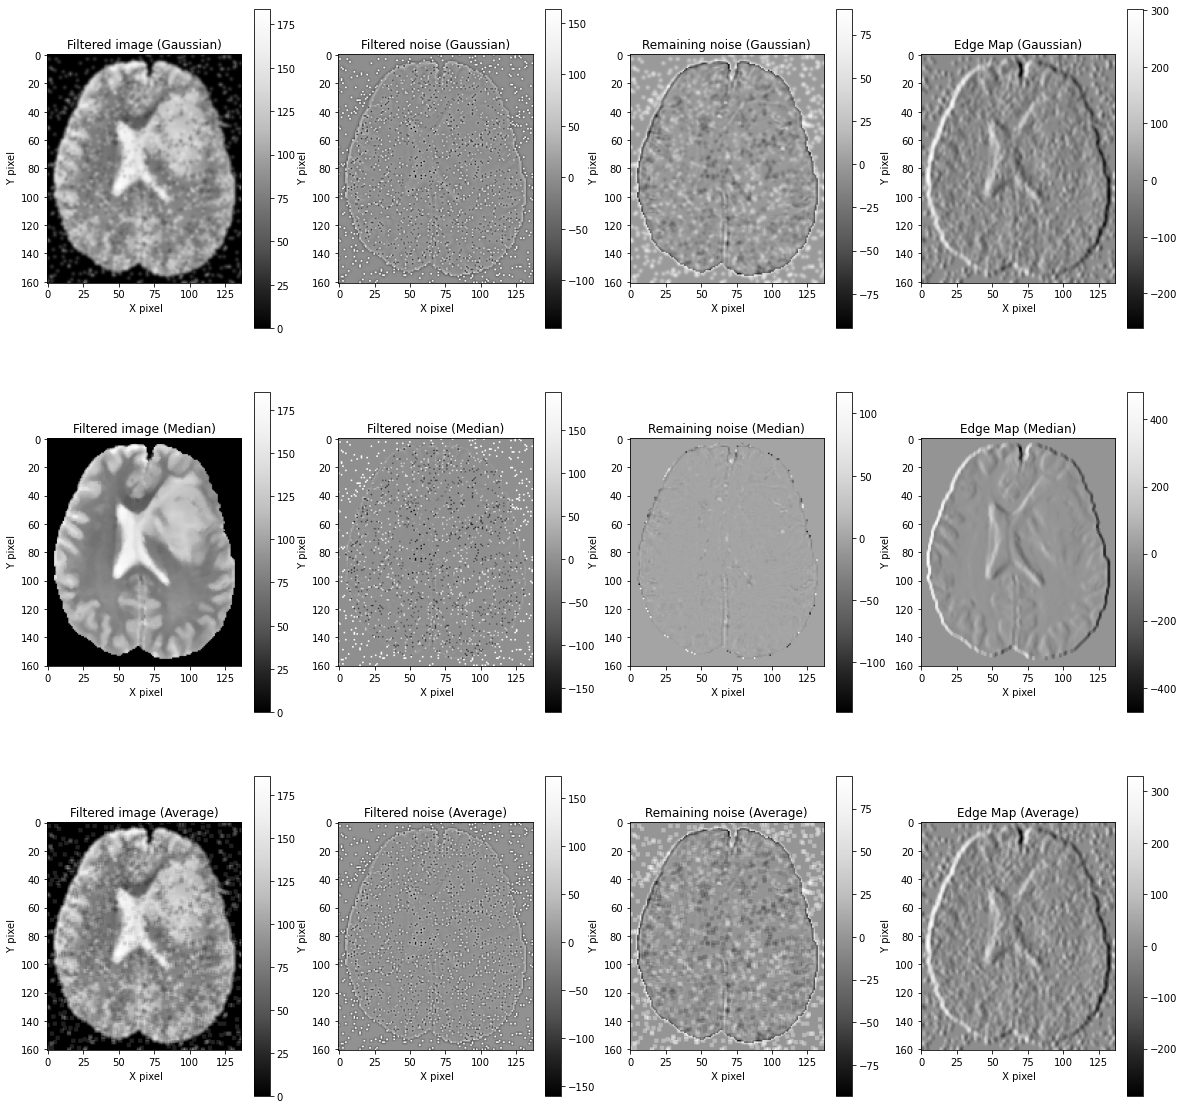

In [73]:
# CODE
import scipy 
from scipy import ndimage
import SimpleITK as sitk
import matplotlib.pyplot as plt
from skimage import metrics
import math
import numpy as np


# Read the ground truth image 'BraTS2021_01666_t2.mha' and the noisy one 'BraTS2021_01666_SP.mha'.
ground_image_sitk = sitk.ReadImage('/Users/test1/Documents/MADICAL_IMAGING/PracticalSession3/BraTS2021_01666/BraTS2021_01666_t2.mha', imageIO="MetaImageIO")
ground_image = sitk.GetArrayFromImage(ground_image_sitk)
noisy_image_sitk = sitk.ReadImage('/Users/test1/Documents/MADICAL_IMAGING/PracticalSession3/BraTS2021_01666/BraTS2021_01666_SP.mha', imageIO="MetaImageIO")
noisy_image = sitk.GetArrayFromImage(noisy_image_sitk)

# Apply Gaussian filtering to the noisy image with a standard deviation of 1.
gaussian_noisy_image = ndimage.gaussian_filter(noisy_image, sigma=1, order=0, output=None, mode='reflect', cval=0.0, truncate=4.0) 

# Calculate the filtered and the remaining noise.
gaussian_filtered_noise = noisy_image - gaussian_noisy_image 
gaussian_remaining_noise = gaussian_noisy_image - ground_image

# Calculate the root mean squared difference (RMSD) between the obtained filtered image and the ground truth.
RMSD_gaussian = math.sqrt(metrics.mean_squared_error(gaussian_noisy_image, ground_image))
print('The Root Mean Squared Difference between the obtained gaussian filtered image and the ground truth is', RMSD_gaussian)

# Create an edge map of the obtained filtered image using the prewitt function.
prewitt_edge_gaussian = ndimage.prewitt(gaussian_noisy_image)

# Repeat the process for a median filter using a kernel of size 3

median_noisy_image = ndimage.median_filter(noisy_image, size=3, footprint=None, output=None, mode='reflect', cval=0.0, origin=0)

# Calculate the filtered and the remaining noise.
median_filtered_noise = noisy_image - median_noisy_image 
median_remaining_noise = median_noisy_image - ground_image

# Calculate the root mean squared difference (RMSD) between the obtained filtered image and the ground truth.
RMSD_median = math.sqrt(metrics.mean_squared_error(median_noisy_image, ground_image))
print('The Root Mean Squared Difference between the obtained median filtered image and the ground truth is',RMSD_median)

# Create an edge map of the obtained filtered image using the prewitt function.
prewitt_edge_median = ndimage.prewitt(median_noisy_image)

# Repeat the process for an average filter using a kernel of size 3

kernel = 1/9 * np.ones((3,3))
average_noisy_image = ndimage.convolve(noisy_image, kernel)

# Calculate the filtered and the remaining noise.
average_filtered_noise = noisy_image - average_noisy_image 
average_remaining_noise = average_noisy_image - ground_image

# Calculate the root mean squared difference (RMSD) between the obtained filtered image and the ground truth.
RMSD_average = math.sqrt(metrics.mean_squared_error(average_noisy_image, ground_image))
print('The Root Mean Squared Difference between the obtained average filtered image and the ground truth is',RMSD_average)

# Create an edge map of the obtained filtered image using the prewitt function.
prewitt_edge_average = ndimage.prewitt(average_noisy_image)

# plot everything
# Show a three-by-four plot that displays the following for each method:
#the resultant filtered image, the filtered noise, the noise that remained 
#and the edge map of the filtered image.
fig, [[ax1, ax2, ax3, ax4], [ax5,ax6,ax7,ax8], [ax9,ax10,ax11,ax12]]= plt.subplots (3, 4, figsize= (20,20))

im1= ax1.imshow (gaussian_noisy_image, cmap=plt.cm.Greys_r)
plt.colorbar(im1, ax=ax1)
ax1.set_xlabel(" X pixel")
ax1.set_ylabel(" Y pixel")
ax1.set_title('Filtered image (Gaussian)')

im5= ax5.imshow (median_noisy_image, cmap=plt.cm.Greys_r)
plt.colorbar(im5, ax=ax5)
ax5.set_xlabel(" X pixel")
ax5.set_ylabel(" Y pixel")
ax5.set_title('Filtered image (Median)')

im9= ax9.imshow (average_noisy_image, cmap=plt.cm.Greys_r)
plt.colorbar(im9, ax=ax9)
ax9.set_xlabel(" X pixel")
ax9.set_ylabel(" Y pixel")
ax9.set_title('Filtered image (Average)')

im2= ax2.imshow (gaussian_filtered_noise, cmap=plt.cm.Greys_r)
plt.colorbar(im2, ax=ax2)
ax2.set_xlabel(" X pixel")
ax2.set_ylabel(" Y pixel")
ax2.set_title('Filtered noise (Gaussian)')

im6= ax6.imshow (median_filtered_noise, cmap=plt.cm.Greys_r)
plt.colorbar(im6, ax=ax6)
ax6.set_xlabel(" X pixel")
ax6.set_ylabel(" Y pixel")
ax6.set_title('Filtered noise (Median)')

im10= ax10.imshow (average_filtered_noise, cmap=plt.cm.Greys_r)
plt.colorbar(im10, ax=ax10)
ax10.set_xlabel(" X pixel")
ax10.set_ylabel(" Y pixel")
ax10.set_title('Filtered noise (Average)')

im3= ax3.imshow (gaussian_remaining_noise, cmap=plt.cm.Greys_r)
plt.colorbar(im3, ax=ax3)
ax3.set_xlabel(" X pixel")
ax3.set_ylabel(" Y pixel")
ax3.set_title('Remaining noise (Gaussian)')

im7= ax7.imshow (median_remaining_noise, cmap=plt.cm.Greys_r)
plt.colorbar(im7, ax=ax7)
ax7.set_xlabel(" X pixel")
ax7.set_ylabel(" Y pixel")
ax7.set_title('Remaining noise (Median)')

im11= ax11.imshow (average_remaining_noise, cmap=plt.cm.Greys_r)
plt.colorbar(im11, ax=ax11)
ax11.set_xlabel(" X pixel")
ax11.set_ylabel(" Y pixel")
ax11.set_title('Remaining noise (Average)')

im4= ax4.imshow (prewitt_edge_gaussian, cmap=plt.cm.Greys_r)
plt.colorbar(im4, ax=ax4)
ax4.set_xlabel(" X pixel")
ax4.set_ylabel(" Y pixel")
ax4.set_title('Edge Map (Gaussian)')

im8= ax8.imshow (prewitt_edge_median, cmap=plt.cm.Greys_r)
plt.colorbar(im8, ax=ax8)
ax8.set_xlabel(" X pixel")
ax8.set_ylabel(" Y pixel")
ax8.set_title('Edge Map (Median)')

im12= ax12.imshow (prewitt_edge_average, cmap=plt.cm.Greys_r)
plt.colorbar(im12, ax=ax12)
ax12.set_xlabel(" X pixel")
ax12.set_ylabel(" Y pixel")
ax12.set_title('Edge Map (Average)')

plt.show()





In [74]:
# save the median filtered image
save_image(median_noisy_image, 'BraTS2021_01666_t2_median', ground_image_sitk)

## EXERCISE 2.1 answer
-The RMSDs obtained by using the linear filters (Gaussian, Average) are more or less the same (15), while the RMSD of the median filter is significantly lower, around 6.3.
This means that the image obtained after median filtering is much more similar to the original one than the other two images.

-We can interpret them as the filtered and remaining noise.

-As the theory shows us, the median filter works best both for preserving the edges and in terms of RMSD. This is becuase it is a non linear filter and it is particularly efficient against the salt and pepper noise (very bright or very dark).

## 2.3 Intensity non-uniformity correction

Non-uniform intensity correction is another common task in image denoising. Grayscale inhomogeneities appear in magnetic resonance (MR) images as systematic changes in the local statistical characteristics of tissues. To reduce these intensity effects Homomorphic Unsharp Masking (HUM) is applied as a post-processing tool.

HUM is conceptually straightforward, can be easily implemented and is very fast. It relies on the assumption that if grayscale inhomogeneities are not present in the image, the mean or median in a local window should match the global mean or median of the overall image. This assumption is approximately true when the filter window is large enough to enclose a representative sample of tissues.

For a detailed implementation see paper: [*''Optimized Homomorphic Unsharp Masking for MR Grayscale Inhomogeneity Correction'' by Benjamin H. Brinkmann, Armando Manduca and Richard A. Robb, IEEE, 1998*](https://ieeexplore.ieee.org/document/700729)

HUM requires the computation of:
- The global mean value $\mu$ of the corrupted image
- The local mean values $\mu_{i,j}$ for each pixel considering a neighbourhood
- The HUM corrected/ideal value of a pixel $f_{i,j} = g_{i,j} \cdot \frac{\mu}{\mu_{i,j}}$, where $g_{i,j}$ is the intensity value of the input image (corrupted/observed image).

## Exercise 2.2

Image 'BraTS2021_01666_bias.mha' is a bias corrupted version of 'BraTS2021_01666_flair.mha'. Implement the HUM algorithm in three different ways to compensate for the artifact:

1. Implement the algorithm straightforward. Because of the size of your local window you will not be able to correct pixels close to the image borders. Use a moving window of size equal to 41 to calculate the local mean.
2. Involve pixels at the image borders by prior padding the image and, thus, enlarging the image. Pad the image with zeros using the half of your window size. To pad the image use [```np.pad```](https://numpy.org/doc/stable/reference/generated/numpy.pad.html)
3. Additional to the padding, try to leave out pixels belonging to the background by using a simple global threshold of 10 over the complete image. In other words, in your calculation of the global mean value do not include the pixels below the threshold.

We expect that for each case you create a function which has the following backbone:
- Calculate global mean image intensity
- Get the half value of the window. Make sure it is in 'int' format.
- Create a template with np.zeros that has the same size as the biased image.
- For points 2 and 3: Before creating the template you will have to pad the biased image with zeros using the half size of your window.
- For point 3: Get global mean intensity of the padded biased image applying the threshold.
- Iterate over the biased image using the window you set, apply the HUM equation: $f_{i,j} = g_{i,j} \cdot \frac{\mu}{\mu_{i,j}}$. Store the new pixel in the template image in a correct location.
- For points 2 and 3: You will have to return to the original image size. To do so you can use ```crop``` function.


After the bias field is removed, calculate the [normalized-root-mean-squared-error](https://scikit-image.org/docs/dev/api/skimage.metrics.html#skimage.metrics.normalized_root_mse) (NRMSE) and the [structural similarity index](https://scikit-image.org/docs/dev/api/skimage.metrics.html#skimage.metrics.structural_similarity)  (SSIM) to evaluate the performance of the denoising algorithms.


**Remarks:** 

- Read the non-bias brain image in '```uint8```' format
- Since you will be padding with zeros, use: $\frac{\mu}{\mu_{i,j} + 1}$
- Make sure the resultant images are in '```uint8```' format

## Report:
<font color=blue>
    
- Plot a one-by-four figure showing the image with bias (BraTS2021_01666_bias.mha) and the three corrected images obtained using the different implementations of the HUM algorithm.
- Provide the values for the NRMSE and SSIM between the three corrected images and the ground truth (BraTS2021_01666_flair.mha).
- Which case had a better performance? Why? Save the best result using ```save_image()```.
    
     </font>

<font color=blue> Your answer here </font>

In [79]:
path_to_image_biased= './BraTS2021_01666/BraTS2021_01666_bias.mha'
image_biased_sitk= sitk.ReadImage (path_to_image)
image_biased= sitk.GetArrayFromImage(image_biased_sitk)
image_truth_sitk = sitk.ReadImage ('./BraTS2021_01666/BraTS2021_01666_flair.mha', outputPixelType=sitk.sitkUInt8)
image_truth = sitk.GetArrayFromImage(image_sitk)
print('the shape of the image is',image_biased.shape)
print('type of the pixels in the original image:', type(image[0,0]))

# implement Homomorphic Unsharp Masking in the three ways
# we implement it manually and use the function scipy.signal.convolve2d with moving average kernelto verify the results

def HUM1(image_biased, window_size=41):
    # image_biased: numpy array
    global_mu = np.mean(image_biased)
    n,m = np.shape(image_biased)
    border = int(window_size/2)
    image_corrected = np.zeros((n,m)) #template
    for i in range(border, n-border):
        for j in range(border,m-border):
            window = image_biased[i-border:i+border, j-border:j+border]
            mu_ij = np.mean(window)
            image_corrected[i,j] = image_biased[i,j]/mu_ij*global_mu
    return np.uint8(image_corrected)

from PIL import Image
from PIL.Image import fromarray

def HUM2(image_biased, window_size=41):
    # image_biased: numpy array
    n,m = np.shape(image_biased)
    global_mu = np.mean(image_biased)
    border = int(window_size/2)
    image_biased_padded = np.pad(image_biased, pad_width=border)
    n_pad,m_pad = np.shape(image_biased_padded)
    image_corrected = np.zeros((n_pad,m_pad)) #template bigger size
    for i in range(border, n_pad-border):
        for j in range(border, m_pad-border):
            window = image_biased_padded[i-border:i+border, j-border:j+border]
            mu_ij = np.mean(window)
            image_corrected[i,j] = image_biased_padded[i,j]/(mu_ij+1)*global_mu
    image_corrected = np.array(fromarray(image_corrected).crop((border,border,border+m,border+n)))
    return np.uint8(image_corrected)

# in third implementation change only the way to calculate global_mu

def HUM3(image_biased, window_size=41, threshold=10):
    # image_biased: numpy array
    n,m = np.shape(image_biased)
    global_mu = np.mean(image_biased, where=image_biased>=threshold)
    border = int(window_size/2)
    image_biased_padded = np.pad(image_biased, pad_width=border)
    n_pad,m_pad = np.shape(image_biased_padded)
    image_corrected = np.zeros((n_pad,m_pad)) #template bigger size
    for i in range(border, n_pad-border):
        for j in range(border, m_pad-border):
            window = image_biased_padded[i-border:i+border, j-border:j+border]
            mu_ij = np.mean(window)
            image_corrected[i,j] = image_biased_padded[i,j]/(mu_ij+1)*global_mu
    image_corrected = np.array(fromarray(image_corrected).crop((border,border,border+m,border+n)))
    return np.uint8(image_corrected)

the shape of the image is (161, 137)
type of the pixels in the original image: <class 'numpy.uint8'>


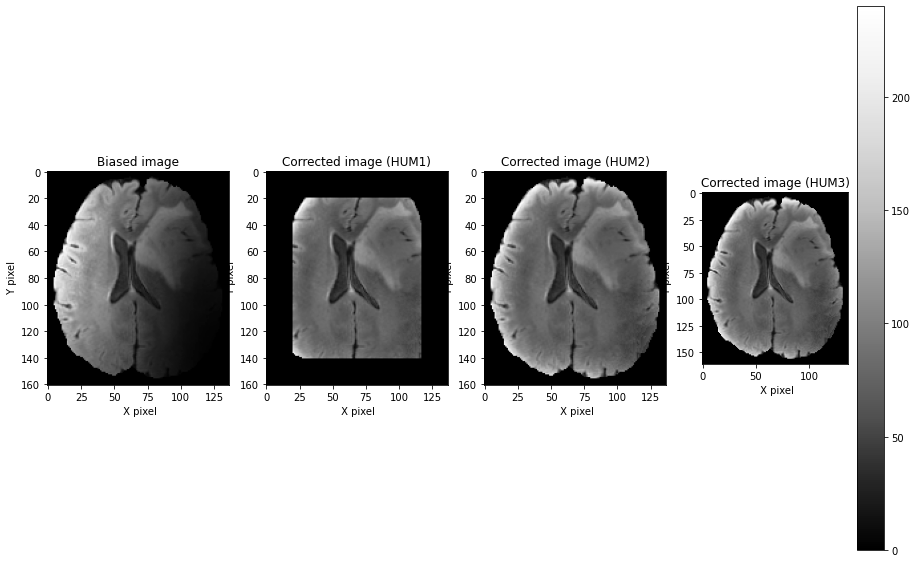

In [80]:
# plot everything
image_corrected1 = HUM1(image_biased)
image_corrected2 = HUM2(image_biased)
image_corrected3 = HUM3(image_biased)

fig, [ax1, ax2, ax3, ax4]= plt.subplots (1, 4, figsize= (15,10))

im1= ax1.imshow (image_biased, cmap=plt.cm.Greys_r)
ax1.set_xlabel(" X pixel")
ax1.set_ylabel(" Y pixel")
ax1.set_title('Biased image')

im2= ax2.imshow (image_corrected1, cmap=plt.cm.Greys_r)
ax2.set_xlabel(" X pixel")
ax2.set_ylabel(" Y pixel")
ax2.set_title('Corrected image (HUM1)')

im3= ax3.imshow (image_corrected2, cmap=plt.cm.Greys_r)
ax3.set_xlabel(" X pixel")
ax3.set_ylabel(" Y pixel")
ax3.set_title('Corrected image (HUM2)')

im4= ax4.imshow (image_corrected3, cmap=plt.cm.Greys_r)
plt.colorbar(im4, ax=ax4)
ax4.set_xlabel(" X pixel")
ax4.set_ylabel(" Y pixel")
ax4.set_title('Corrected image (HUM3)')

plt.show()



In [81]:
# performance evaluation: calculate the errors
from skimage.metrics import normalized_root_mse, structural_similarity

NRMSE_1 = normalized_root_mse(image_truth, image_corrected1)
NRMSE_2 = normalized_root_mse(image_truth, image_corrected2)
NRMSE_3 = normalized_root_mse(image_truth, image_corrected3)

SSIM_1 = structural_similarity(image_truth, image_corrected1)
SSIM_2 = structural_similarity(image_truth, image_corrected2)
SSIM_3 = structural_similarity(image_truth, image_corrected3)
print('The normmalized root mse of the three corrected images are respectively:', (NRMSE_1, NRMSE_2, NRMSE_3))
print('The structural similarities of the three corrected images are respectively:', (SSIM_1, SSIM_2, SSIM_3))



The normmalized root mse of the three corrected images are respectively: (0.686226638836721, 0.5503871278486745, 0.37079502896114314)
The structural similarities of the three corrected images are respectively: (0.48921788807063465, 0.7037611301976237, 0.8308200548806742)


## EXERCISE 2.2 answer:
Both the indices NRMSE and SSIM indicate that the best algorithm is the third one: indeed it is the one taking into account more properties of the image. HUM1 sets the borders directly to 0 ignoring their values. HUM2 performs padding but in the calculation of the global mean does not take into account that there can be a meaningful background (we set the background pixel to zero) that can affect the mean. These two approaches imply a poorer performance.

In [82]:
# save the HUM3 corrected image
save_image(image_corrected3, 'BraTS2021_01666_bias_HUM', image_truth_sitk)